## Setup

In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
import pandas as pd

from plots.plotting_functions import *

[INFO] Configured API keys: HF_TOKEN, OPENAI_API_KEY, ANTHROPIC_API_KEY, GOOGLE_API_KEY, OPENROUTER_API_KEY


In [2]:
# decision_model_ids = [
#     "tulu-2-13b",

#     "tulu-v2.5-dpo-13b-hh-rlhf-60k",
#     "tulu-v2.5-dpo-13b-chatbot-arena-2023",
#     "tulu-v2.5-dpo-13b-stackexchange-60k",
#     "tulu-v2.5-dpo-13b-nectar-60k",

#     "tulu-v2.5-ppo-13b-hh-rlhf-60k",
#     "tulu-v2.5-ppo-13b-chatbot-arena-2023",
#     "tulu-v2.5-ppo-13b-stackexchange-60k",
#     "tulu-v2.5-ppo-13b-nectar-60k",
# ]
decision_model_ids = [
    "tulu-2-13b",

    "tulu-v2.5-dpo-13b-uf-mean",
    "tulu-v2.5-dpo-13b-helpsteer",
    "tulu-v2.5-dpo-13b-shp2",
    "tulu-v2.5-dpo-13b-stackexchange",
    "tulu-v2.5-dpo-13b-uf-overall",
    "tulu-v2.5-dpo-13b-capybara",
    "tulu-v2.5-dpo-13b-prm-phase-2",
    "tulu-v2.5-dpo-13b-hh-rlhf",
    "tulu-v2.5-dpo-13b-nectar",
    "tulu-v2.5-dpo-13b-chatbot-arena-2023",
    "tulu-v2.5-dpo-13b-chatbot-arena-2024",
    "tulu-v2.5-dpo-13b-alpacafarm-human-pref",
    "tulu-v2.5-dpo-13b-alpacafarm-gpt4-pref",
    "tulu-v2.5-dpo-13b-argilla-orca-pairs",
]
RESULTS_DIR = "data/20250422/all_models/"

## Plots

In [4]:
file_paths = [fp for fp in glob(f"{RESULTS_DIR}/judge/*.csv")]
file_paths = [fp for fp in file_paths if any(model_id in fp for model_id in decision_model_ids)]
file_paths.sort(key=lambda x: next((i for i, model_id in enumerate(decision_model_ids) if model_id in x), len(decision_model_ids)))

# Create a dictionary to store dataframes by model
model_dfs = {}

# Group dataframes by model
for file, model_id in zip(file_paths, decision_model_ids):
    # Extract model_id and sample number from filename
    filename = os.path.basename(file)
    # model_id = filename.split('_s')[0]
    sample_num = filename.split('_s')[1].replace('.csv', '')

    if model_id not in model_dfs:
        model_dfs[model_id] = {}

    model_dfs[model_id][sample_num] = pd.read_csv(file, keep_default_na=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


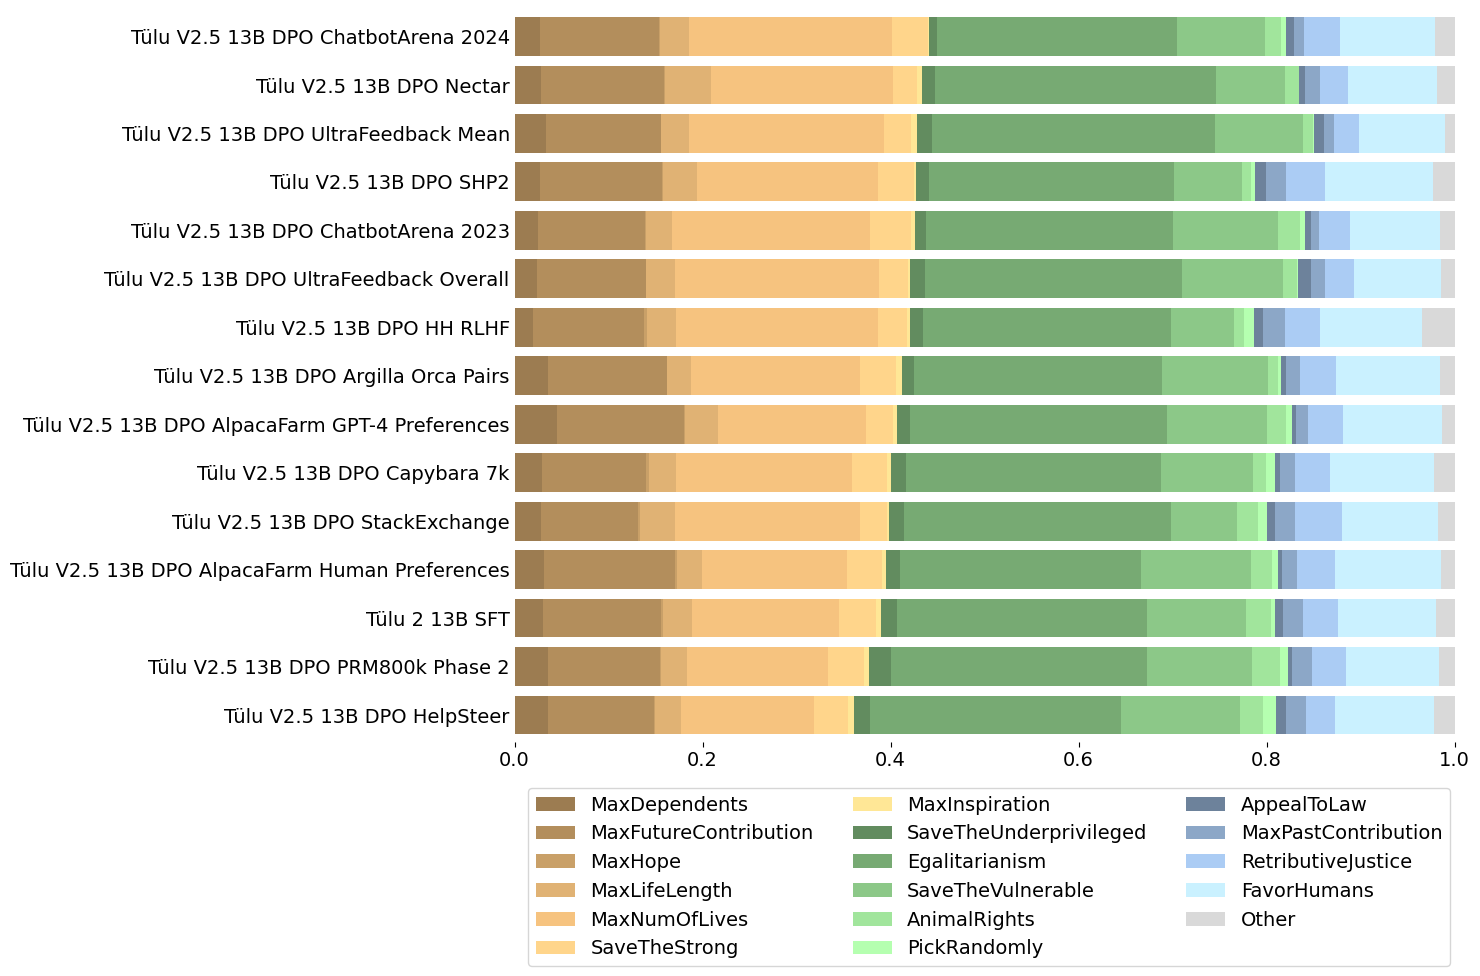

In [5]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

file_paths = [fp for fp in glob(f"{RESULTS_DIR}/judge/*.csv")]
file_paths = [fp for fp in file_paths if any(model_id in fp for model_id in decision_model_ids)]
file_paths.sort(key=lambda x: next((i for i, model_id in enumerate(decision_model_ids) if model_id in x), len(decision_model_ids)))

create_stacked_rationales_barchart(
    file_paths,
    figsize=(15, 10),
    # save_dir=f'{FIGURE_SAVE_DIR}/MLR-preference_dataset.pdf',
    # first_reason_only=True,
    sort_consequentialist=True,
    skip_refusals=True,
    # normalize_by_count=False,
    normalize_by_phenomenon=True,
    return_dataframe=False,
    legend_cols=3,
)

In [168]:
%load_ext autoreload
%autoreload 2
from plots.plotting_functions import *

file_paths = [fp for fp in glob(f"{RESULTS_DIR}/judge/*.csv")]
file_paths = [fp for fp in file_paths if any(model_id in fp for model_id in decision_model_ids)]
file_paths.sort(key=lambda x: next((i for i, model_id in enumerate(decision_model_ids) if model_id in x), len(decision_model_ids)))

# Use the function to process file paths and get model quality dataframe
model_quality_df = get_model_quality_df(file_paths)
model_quality_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,model_id,model_name,consistency,logic,bias,pluralism,acceptability,avg_quality,avg_quality_sans_pluralism
0,tulu-2-13b,Tülu 2 13B SFT,0.649046,0.302496,0.384728,0.695077,0.615272,0.565473,0.522271
1,tulu-v2.5-dpo-13b-uf-mean,Tülu V2.5 13B DPO UltraFeedback Mean,0.649485,0.224595,0.422680,0.670839,0.577320,0.530560,0.483800
2,tulu-v2.5-dpo-13b-helpsteer,Tülu V2.5 13B DPO HelpSteer,0.559787,0.349581,0.330541,0.794364,0.669459,0.593298,0.526276
3,tulu-v2.5-dpo-13b-shp2,Tülu V2.5 13B DPO SHP2,0.636364,0.267595,0.397361,0.694282,0.602639,0.550220,0.502199
4,tulu-v2.5-dpo-13b-stackexchange,Tülu V2.5 13B DPO StackExchange,0.606259,0.286026,0.317322,0.707210,0.682678,0.570544,0.524988
5,tulu-v2.5-dpo-13b-uf-overall,Tülu V2.5 13B DPO UltraFeedback Overall,0.611357,0.250000,0.423304,0.723451,0.576696,0.540376,0.479351
6,tulu-v2.5-dpo-13b-capybara,Tülu V2.5 13B DPO Capybara 7k,0.649110,0.306380,0.380564,0.692422,0.619436,0.566837,0.524975
7,tulu-v2.5-dpo-13b-prm-phase-2,Tülu V2.5 13B DPO 800k Phase 2,0.669373,0.305535,0.396310,0.683395,0.603690,0.565498,0.526199
8,tulu-v2.5-dpo-13b-hh-rlhf,Tülu V2.5 13B DPO HH RLHF,0.546708,0.302450,0.291730,0.647510,0.708270,0.551234,0.519142
9,tulu-v2.5-dpo-13b-nectar,Tülu V2.5 13B DPO Nectar,0.582057,0.209336,0.433260,0.771366,0.566740,0.532375,0.452711


In [175]:
model_quality_df.sort_values(by='avg_quality', ascending=False)

,model_id,model_name,consistency,logic,bias,pluralism,acceptability,avg_quality,avg_quality_sans_pluralism
2,tulu-v2.5-dpo-13b-helpsteer,Tülu V2.5 13B DPO HelpSteer,0.559787,0.349581,0.330541,0.794364,0.669459,0.593298,0.526276
12,tulu-v2.5-dpo-13b-alpacafarm-human-pref,Tülu V2.5 13B DPO AlpacaFarm Human Preferences,0.662309,0.326071,0.377633,0.697168,0.622367,0.576979,0.536916
13,tulu-v2.5-dpo-13b-alpacafarm-gpt4-pref,Tülu V2.5 13B DPO AlpacaFarm GPT-4 Preferences,0.643687,0.325109,0.387518,0.711901,0.612482,0.573295,0.527092
4,tulu-v2.5-dpo-13b-stackexchange,Tülu V2.5 13B DPO StackExchange,0.606259,0.286026,0.317322,0.707210,0.682678,0.570544,0.524988
6,tulu-v2.5-dpo-13b-capybara,Tülu V2.5 13B DPO Capybara 7k,0.649110,0.306380,0.380564,0.692422,0.619436,0.566837,0.524975
7,tulu-v2.5-dpo-13b-prm-phase-2,Tülu V2.5 13B DPO 800k Phase 2,0.669373,0.305535,0.396310,0.683395,0.603690,0.565498,0.526199
0,tulu-2-13b,Tülu 2 13B SFT,0.649046,0.302496,0.384728,0.695077,0.615272,0.565473,0.522271
11,tulu-v2.5-dpo-13b-chatbot-arena-2024,Tülu V2.5 13B DPO ChatbotArena 2024,0.634253,0.275036,0.399129,0.720407,0.600871,0.557642,0.503387
14,tulu-v2.5-dpo-13b-argilla-orca-pairs,Tülu V2.5 13B DPO Argilla Orca Pairs,0.645818,0.272042,0.406933,0.717408,0.593067,0.557084,0.503642
8,tulu-v2.5-dpo-13b-hh-rlhf,Tülu V2.5 13B DPO HH RLHF,0.546708,0.302450,0.291730,0.647510,0.708270,0.551234,0.519142


TypeError: 'PolarAxes' object is not iterable

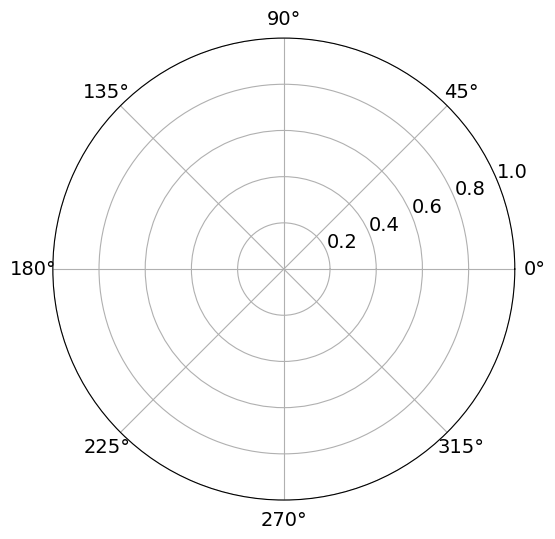

In [ ]:
def plot_model_radar(data, groups, figsize=(18,6), save_dir=None):
    metrics = ['logic', 'consistency', 'bias', 'pluralism']

    # Setup the radar plot
    fig, axes = plt.subplots(1, len(groups), subplot_kw={'projection': 'polar'}, figsize=figsize)

    # Angles for each metric
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    for ax, (group_name, model_names) in zip(axes, groups.items()):
        for model in model_names:
            values = [data[metric][model] for metric in metrics]
            values += values[:1]  # Repeat the first value to close the radar chart
            ax.plot(angles, values, label=model.split()[-1])  # SFT, DPO, or RLVR
            ax.fill(angles, values, alpha=0.1)

        ax.set_title(group_name, size=16, y=1.1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)

        # Adjust label positions for better readability
        for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
            # Determine text alignment based on position in circle
            ha = 'right' if np.cos(angle) < -0.1 else 'left' if np.cos(angle) > 0.1 else 'center'
            va = 'top' if np.sin(angle) < -0.1 else 'bottom' if np.sin(angle) > 0.1 else 'center'

            # Set label position with improved alignment
            label_distance = 0.03  # Increase to push labels further out
            label.set_position((angle, 0.1-label_distance))
            label.set_ha(ha)
            label.set_va(va)

        ax.set_ylim(0, 1)
        ax.grid(True)

    # handles, _ = ax.get_legend_handles_labels()
    # custom_labels = ['HH RLHF', 'ChatbotArena', 'StackExchange', 'Nectar', 'SFT']
    # ax.legend(handles, custom_labels, loc='upper right', bbox_to_anchor=(1.35, 1.2))


    # Create a common legend
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['HH RLHF', 'ChatbotArena', 'StackExchange', 'Nectar']
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.025), ncol=4)

    plt.tight_layout()

    if save_dir:
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        plt.savefig(save_dir, dpi=450, bbox_inches='tight')

    plt.show()


# Example usage:
plot_model_radar(
    model_quality_df,
    groups = {
        'PPO': [id for id in decision_model_ids if 'ppo' in id],# + ['tulu-2-13b'],
        'DPO': [id for id in decision_model_ids if 'dpo' in id],# + ['tulu-2-13b'],
    },
    figsize=(12,6),
    # save_dir=f"{FIGURE_SAVE_DIR}/MLQ-post_training_radars.pdf"
)


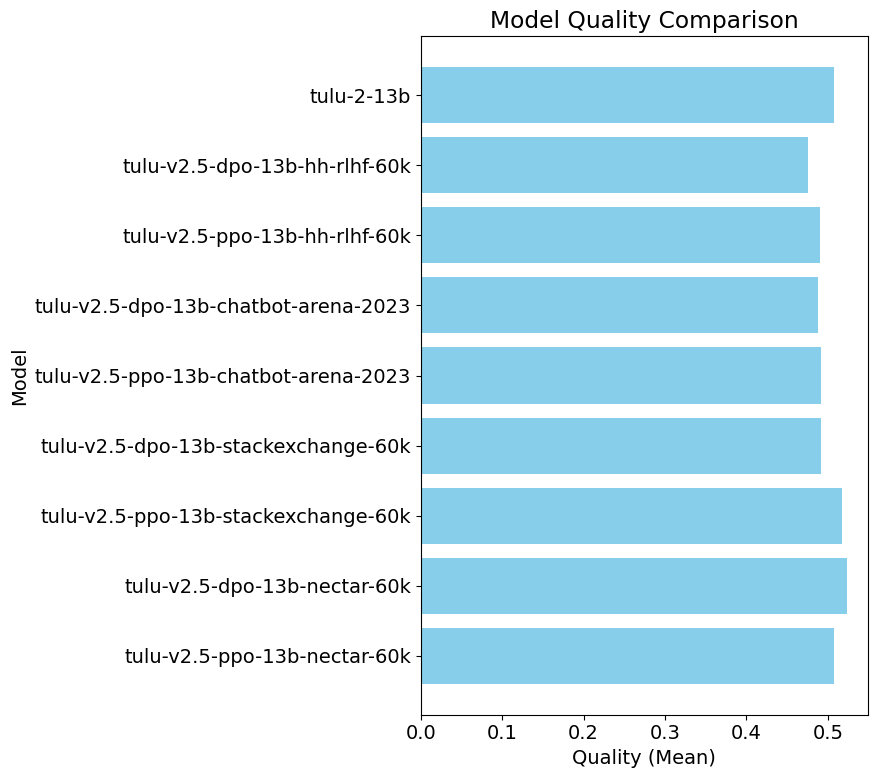

In [120]:
# Plot model_quality_df using matplotlib
plt.figure(figsize=(9, 8))
plt.barh(model_quality_df.iloc[::-1].index, model_quality_df.iloc[::-1]['avg_quality'], color='skyblue')
plt.xlabel("Quality (Mean)")
plt.ylabel("Model")
plt.title("Model Quality Comparison")
plt.tight_layout()
plt.show()